In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#For Pre-Processing
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize
import os, re, csv, math, codecs


# For Training
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Model,Sequential

# For array, dataset, and visualizing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
np.random.seed(0)

MAX_NB_WORDS = 100000
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stop_words.update(['।','.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])




from sklearn.model_selection import train_test_split , LeaveOneOut
import pandas as pd
import numpy as np
np.random.seed(5)
import os
import keras.regularizers as regular
from keras.layers import Input, Dense,Conv1D,LSTM,GRU, Dropout, Flatten, Concatenate, MaxPool1D, Embedding, TimeDistributed, Bidirectional,Add, BatchNormalization
from keras.models import Model,Sequential
from keras import regularizers
import keras
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import mean_absolute_error
from imblearn.metrics import macro_averaged_mean_absolute_error

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# !pip install indic-nlp-library

In [3]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/MyDrive/Hindi AD/new_Manual_dataset.csv')


In [4]:
data

,text,google_translated_text,mbart50_m2m,m2m_100_1.2B,opus-mt,Result,Labels,manual_trans
0,the scene is in the kitchen.the mother is wipi...,दृश्य रसोई में है। माँ व्यंजन पोंछ रही है और प...,दृश्य रसोई में है। मां बर्तन धो रही है और पानी...,दृश्य रसोईघर में है. माँ डिश धो रही है और पानी...,यह दृश्‍य किचिन में है । एक लड़का एक घड़े से क...,Control,0,दृश्य रसोई की है। माँ बर्तन पोंछ रही है और पान...
1,oh i see the sink is running over . i see the ...,"ओह, मुझे लगता है कि सिंक खत्म हो रहा है। मुझे ...",ओह मैं देखता हूँ सिंक ऊपर चल रहा है। मैं देखता...,मैं देखता हूं कि सिंहासन चल रहा है। मैं देखता ...,ओह मैं सिंक खत्म हो रहा है देखते हैं. मुझे लगत...,Control,0,"ओह, मैं देख रहा हूँ कि सिंक बह निकला है।मैं दे..."
2,a boy and a girl are in the kitchen with their...,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,एक लड़का और एक लड़की अपनी मां के साथ रसोई में ...,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,Control,0,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...
3,okay . it was summertime and mother and the ch...,ठीक है । यह गर्मियों में था और माँ और बच्चे रस...,ठीक है। यह गर्मी का समय था और माँ और बच्चे रसो...,ठीक है। यह गर्मियों का समय था और माँ और बच्चे ...,ठीक है. गर्मियों का मौसम था और माँ और बच्चे रस...,Control,0,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...
4,wait until i put my glasses on . oh there's a ...,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता। ओह...,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें। ...,तब तक इंतज़ार करें जब तक मैं अपने चश्मा पहनता ...,"मैं पर मेरे चश्मा डाल जब तक इंतजार करें. ओह, ए...",Control,0,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...
...,...,...,...,...,...,...,...,...
543,well the little kid's falling off his stool . ...,खैर छोटा बच्चा अपने स्टूल से गिर रहा है। और मा...,"ठीक है, छोटा बच्चा अपनी कुर्सी से गिर रहा है। ...",छोटा बच्चा अपने कुर्सी से गिर रहा है। माँ के प...,छोटा बच्चा अपनी चौकी से गिर रहा है. और वह (बस्...,Dementia,1,अच्छ छोटा बच्चा अपने मल से गिर रहा है। और माँ ...
544,mhm . well this one is in the cookie jar . and...,एमएचएम। खैर यह एक कुकी जार में है। और उसने चढ़...,mhm। यह एक कुकी के बर्तन में है। और वो चढ़ने क...,एमएम यह एक कुकी जार में है। और वह चढ़ने की कोश...,mh. अच्छी तरह से इस आदमी कुकी जार में है. और व...,Dementia,1,महम। अच्छा यह कुकी जार में है। और उसने चढ़ने क...
545,hm the little boy is on the stool which is ti...,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,"हां, छोटा लड़का स्टूल पर है जो झुक रहा है और व...","हाँ, छोटा लड़का कुर्सी पर है जो टिपिंग कर रहा ...",छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,Dementia,1,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...
546,oh you want me to tell you . the mother and he...,"ओह, आप चाहते हैं कि मैं आपको बताऊं। माँ और उसक...",ओह तुम चाहते हो कि मैं तुम्हें बता दूँ। मां और...,आप चाहते हैं कि मैं आपको बताऊं। मां और उसके दो...,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं. मा...,Dementia,1,"ओह, आप चाहते हैं कि मैं आपको बता दूं। माँ और उ..."


In [5]:
data['mbart50_m2m'] = data[['mbart50_m2m']].apply(lambda x: x.str.strip()).replace('', np.nan)
data = data.dropna(subset=['mbart50_m2m'])
data.reset_index(drop=True, inplace=True)

In [6]:
len(data)

548

In [7]:
punctuation_signs = list("?:!.,;|।")
data['mbart50_m2m'] = data['mbart50_m2m']

for punct_sign in punctuation_signs:   
    data['mbart50_m2m'] = data['mbart50_m2m'].str.replace(punct_sign, '')

<ipython-input-7-2c760b2081ef>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['mbart50_m2m'] = data['mbart50_m2m'].str.replace(punct_sign, '')


In [8]:
data['mbart50_m2m'] = data['mbart50_m2m'].apply(lambda x: x.replace('\n', ' '))
data['mbart50_m2m'] = data['mbart50_m2m'].apply(lambda x: x.replace('\t', ' '))
data['mbart50_m2m'] = data['mbart50_m2m'].apply(lambda x: x.replace('।', ' '))
data['mbart50_m2m'] = data['mbart50_m2m'].str.replace("    ", " ")
data['mbart50_m2m'] = data['mbart50_m2m'].str.replace('"', '')
data['mbart50_m2m'] = data['mbart50_m2m'].str.replace("'s", "")
data['mbart50_m2m'] = data['mbart50_m2m'].str.replace("।", "")

In [9]:
data

,text,google_translated_text,mbart50_m2m,m2m_100_1.2B,opus-mt,Result,Labels,manual_trans
0,the scene is in the kitchen.the mother is wipi...,दृश्य रसोई में है। माँ व्यंजन पोंछ रही है और प...,दृश्य रसोई में है मां बर्तन धो रही है और पानी ...,दृश्य रसोईघर में है. माँ डिश धो रही है और पानी...,यह दृश्‍य किचिन में है । एक लड़का एक घड़े से क...,Control,0,दृश्य रसोई की है। माँ बर्तन पोंछ रही है और पान...
1,oh i see the sink is running over . i see the ...,"ओह, मुझे लगता है कि सिंक खत्म हो रहा है। मुझे ...",ओह मैं देखता हूँ सिंक ऊपर चल रहा है मैं देखता ...,मैं देखता हूं कि सिंहासन चल रहा है। मैं देखता ...,ओह मैं सिंक खत्म हो रहा है देखते हैं. मुझे लगत...,Control,0,"ओह, मैं देख रहा हूँ कि सिंक बह निकला है।मैं दे..."
2,a boy and a girl are in the kitchen with their...,एक लड़का और एक लड़की अपनी माँ के साथ रसोई में ...,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,एक लड़का और एक लड़की अपनी मां के साथ रसोई में ...,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,Control,0,एक लड़का और एक लड़की रसोई में अपनी माँ के साथ ...
3,okay . it was summertime and mother and the ch...,ठीक है । यह गर्मियों में था और माँ और बच्चे रस...,ठीक है यह गर्मी का समय था और माँ और बच्चे रसोई...,ठीक है। यह गर्मियों का समय था और माँ और बच्चे ...,ठीक है. गर्मियों का मौसम था और माँ और बच्चे रस...,Control,0,गर्मी का मौसम था और माँ और बच्चे रसोई में काम ...
4,wait until i put my glasses on . oh there's a ...,तब तक रुको जब तक मैं अपना चश्मा नहीं डालता। ओह...,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें ओ...,तब तक इंतज़ार करें जब तक मैं अपने चश्मा पहनता ...,"मैं पर मेरे चश्मा डाल जब तक इंतजार करें. ओह, ए...",Control,0,जब तक मैं अपना चश्मा नहीं लगाता तब तक प्रतीक्ष...
...,...,...,...,...,...,...,...,...
543,well the little kid's falling off his stool . ...,खैर छोटा बच्चा अपने स्टूल से गिर रहा है। और मा...,ठीक है छोटा बच्चा अपनी कुर्सी से गिर रहा है और...,छोटा बच्चा अपने कुर्सी से गिर रहा है। माँ के प...,छोटा बच्चा अपनी चौकी से गिर रहा है. और वह (बस्...,Dementia,1,अच्छ छोटा बच्चा अपने मल से गिर रहा है। और माँ ...
544,mhm . well this one is in the cookie jar . and...,एमएचएम। खैर यह एक कुकी जार में है। और उसने चढ़...,mhm यह एक कुकी के बर्तन में है और वो चढ़ने की ...,एमएम यह एक कुकी जार में है। और वह चढ़ने की कोश...,mh. अच्छी तरह से इस आदमी कुकी जार में है. और व...,Dementia,1,महम। अच्छा यह कुकी जार में है। और उसने चढ़ने क...
545,hm the little boy is on the stool which is ti...,एचएम छोटा लड़का स्टूल पर है जो टिपिंग कर रहा ह...,हां छोटा लड़का स्टूल पर है जो झुक रहा है और वह...,"हाँ, छोटा लड़का कुर्सी पर है जो टिपिंग कर रहा ...",छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,Dementia,1,हम्म छोटा लड़का स्टूल पर है जो ढो रहा है और वह...
546,oh you want me to tell you . the mother and he...,"ओह, आप चाहते हैं कि मैं आपको बताऊं। माँ और उसक...",ओह तुम चाहते हो कि मैं तुम्हें बता दूँ मां और ...,आप चाहते हैं कि मैं आपको बताऊं। मां और उसके दो...,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं. मा...,Dementia,1,"ओह, आप चाहते हैं कि मैं आपको बता दूं। माँ और उ..."


In [10]:
text = data['mbart50_m2m'].tolist()
clas = data['Labels'].tolist()

data = pd.DataFrame({'text': text, 'target': clas})

In [11]:
data

,text,target
0,दृश्य रसोई में है मां बर्तन धो रही है और पानी ...,0
1,ओह मैं देखता हूँ सिंक ऊपर चल रहा है मैं देखता ...,0
2,एक लड़का और एक लड़की मां के साथ रसोईघर में हैं...,0
3,ठीक है यह गर्मी का समय था और माँ और बच्चे रसोई...,0
4,जब तक मैं अपने चश्मा लगाएं तक प्रतीक्षा करें ओ...,0
...,...,...
543,ठीक है छोटा बच्चा अपनी कुर्सी से गिर रहा है और...,1
544,mhm यह एक कुकी के बर्तन में है और वो चढ़ने की ...,1
545,हां छोटा लड़का स्टूल पर है जो झुक रहा है और वह...,1
546,ओह तुम चाहते हो कि मैं तुम्हें बता दूँ मां और ...,1


In [12]:
# # tokenization
# from indicnlp.tokenize import indic_tokenize
# def tokenization(indic_string):
#     tokens = []
#     for t in indic_tokenize.trivial_tokenize(indic_string):
#         tokens.append(t)
#     return tokens
# data['text'] = data['text'].apply(lambda x: tokenization(x))

In [ ]:
# punctuations = ['nn','n','–', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "\'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', "#", '*', '', ';', '-', '}','|','"']

# stopwords_ni = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 
#                 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 
#                 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 
#                 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों',
#                 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी',
#                 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते',
#                 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 
#                 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 
#                 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
# to_be_removed =   punctuations
# # {'पर': 6, 'गर': 4, 'उन': 0, 'एम': 3, 'भन': 7, 'एक': 2, 'सक': 8, 'उव': 1, 'हर': 9, 'छन': 5}

# for i in range(len(data)):
#     data['text'][i]=[ele for ele in data['text'][i] if ele not in (to_be_removed)]
# # count_length()
# data.tail(2)

In [ ]:
data.head(2)

In [ ]:
# len(stopwords_ni)

In [ ]:
# for i in range(len(data)):
#     data['text'][i] = [s.replace("\n", "") for s in data['text'][i]]

In [ ]:
data

In [13]:
# # #Remove comma as a seperators
# for i in range(len(data)):
#     data['text'][i] = ' '.join(data['text'][i])
# data.tail(2)

In [14]:
train_df, test_df = train_test_split(data, test_size=0.10, random_state=42, shuffle=True)

In [15]:
len(train_df)

493

In [16]:
len(test_df)

55

<ipython-input-17-89a3e2d80d32>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')


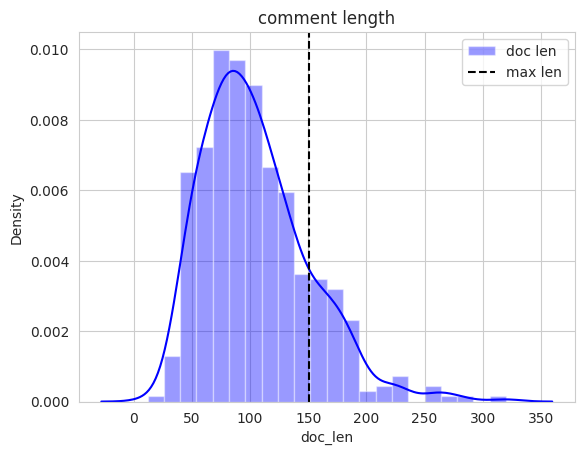

In [17]:
label_names = ["target"]
y_train = train_df[label_names].values
train_df['doc_len'] = train_df['text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train_df['doc_len'].mean() + train_df['doc_len'].std()).astype(int)

sns.distplot(train_df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('comment length'); plt.legend()
plt.show()


In [18]:
from sklearn.utils import shuffle
from keras.utils import pad_sequences


raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
num_classes = len(label_names)

print("pre-processing train data...")

processed_docs_train = []
for doc in tqdm(raw_docs_train):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_train.append(" ".join(filtered))
#end for

processed_docs_test = []
for doc in tqdm(raw_docs_test):
    tokens = word_tokenize(doc)
    filtered = [word for word in tokens if word not in stop_words]
    processed_docs_test.append(" ".join(filtered))
#end for

print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train = pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = pad_sequences(word_seq_test, maxlen=max_seq_len)

pre-processing train data...


100%|██████████| 55/55 [00:00<00:00, 2017.16it/s]


tokenizing input data...
dictionary size:  2013


In [19]:
len(word_seq_train)

493

In [20]:
len(word_seq_test)

55

In [21]:
max_seq_len

151

In [22]:
# f = fasttext.load_model('/content/gdrive/MyDrive/pretrained_model/cc.hi.300.bin')


print('loading word embeddings...')

embeddings_index = {}
f = codecs.open('/content/gdrive/MyDrive/pretrained_model/cc.hi.300.vec', encoding='utf-8')

for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('found %s word vectors' % len(embeddings_index))

loading word embeddings...


1876654it [04:12, 7446.51it/s]

found 1876654 word vectors


In [23]:

#training params
batch_size = 128
num_epochs = 20

#model parameters
num_filters = 32 
embed_dim = 300 
weight_decay = 0.97

In [24]:

#embedding matrix

print('preparing embedding matrix...')

words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


preparing embedding matrix...
number of null word embeddings: 121


In [25]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['सीनक' 'स्प्लाशिंग' 'फुसके' 'inum' 'स्पिगोट' 'fouled' 'फ्यूट' 'भिखाए'
 'दिनdreaming' 'वाow']


In [26]:
embedding_matrix.shape

(2014, 300)

## Bi-LSTM

In [120]:
model = Sequential()
# model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False))
model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len))
model.add(Bidirectional(LSTM(32 , activation='tanh' ,return_sequences=True ,  input_shape = (140 , 300) ,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) )))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(16 , activation = 'tanh', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)  )))
model.add(Dropout(0.3))

model.add(Dense(128 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) ))
model.add(Dropout(0.3))
model.add(Dense(64 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid' ))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 151, 300)          604200    
                                                                 
 bidirectional_12 (Bidirecti  (None, 151, 64)          85248     
 onal)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 151, 64)           0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 32)               10368     
 onal)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [121]:

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD,Adam



# opt = Adam(clipvalue=0.5,learning_rate=0.0001)
opt = Adam()
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])


In [122]:
word_seq_train

array([[  0,   0,   0, ...,   1,  46,  19],
       [  0,   0,   0, ...,   8,   1, 188],
       [  0,   0,   0, ...,  50, 104,  17],
       ...,
       [  0,   0,   0, ...,  70,  13,   1],
       [  0,   0,   0, ...,  19, 848,   1],
       [429,   4,   1, ...,  35,  64,   1]], dtype=int32)

In [123]:
word_seq_train.shape

(493, 151)

In [124]:
y_train.shape

(493, 1)

In [125]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, Y_train = SMOTE().fit_resample(word_seq_train, y_train)



In [126]:
# X_train.shape
# y_train.shape

In [127]:
# es_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(word_seq_train, y_train , batch_size=256,
          epochs=25, validation_split=0.10, shuffle=False)
     


Epoch 1/25
2/2 [==============================] - 17s 3s/step - loss: 0.8201 - accuracy: 0.5034 - val_loss: 0.8143 - val_accuracy: 0.6000
Epoch 2/25
2/2 [==============================] - 2s 1s/step - loss: 0.8151 - accuracy: 0.5418 - val_loss: 0.8071 - val_accuracy: 0.6000
Epoch 3/25
2/2 [==============================] - 3s 1s/step - loss: 0.8100 - accuracy: 0.5485 - val_loss: 0.7991 - val_accuracy: 0.6000
Epoch 4/25
2/2 [==============================] - 4s 2s/step - loss: 0.8059 - accuracy: 0.5508 - val_loss: 0.7905 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 3s 1s/step - loss: 0.8010 - accuracy: 0.5508 - val_loss: 0.7820 - val_accuracy: 0.6000
Epoch 6/25
2/2 [==============================] - 2s 1s/step - loss: 0.7950 - accuracy: 0.5508 - val_loss: 0.7742 - val_accuracy: 0.6000
Epoch 7/25
2/2 [==============================] - 2s 1s/step - loss: 0.7894 - accuracy: 0.5508 - val_loss: 0.7662 - val_accuracy: 0.6000
Epoch 8/25
2/2 [========================

In [128]:
# #generate plots
# plt.figure()
# plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
# plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
# plt.title('LSTM sentiment')
# plt.xlabel('Epochs')
# plt.ylabel('Cross-Entropy Loss')
# plt.legend(loc='upper right')
# plt.show()

In [129]:
# plt.figure()
# plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
# plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
# plt.title('LSTM sentiment')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()


In [130]:
predictions = model.predict(word_seq_test)
# predictions= predictions.ravel()

# sample=pd.read_csv('test_dat.csv')
test_df['pred']= (predictions>0.5).astype(int)
test_df[['pred', "target"]]

2/2 [==============================] - 3s 139ms/step


,pred,target
247,1,1
78,1,0
245,1,1
353,1,1
477,1,1
541,1,1
335,1,1
319,1,1
250,0,1
82,0,0


In [131]:
predictions.shape

(55, 1)

In [132]:
word_seq_test.shape

(55, 151)

In [133]:
test_df[["target"]].shape

(55, 1)

In [134]:
predictions.shape

(55, 1)

In [135]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.metrics import macro_averaged_mean_absolute_error

print("Accuracy -> ",accuracy_score(test_df.target, test_df.pred))
print("Recall -> ",recall_score(test_df.target, test_df.pred,average='macro'))
print("Precision -> ",precision_score(test_df.target, test_df.pred,average='macro'))
print("F1 score -> ",f1_score(test_df.target, test_df.pred,average='macro'))
# print("MAE -> ",mean_absolute_error(test_df.target, test_df.pred))
print("Macro MAE -> ",macro_averaged_mean_absolute_error(test_df.target, test_df.pred))
print(confusion_matrix(test_df.target, test_df.pred))

Accuracy ->  0.7454545454545455
Recall ->  0.7365591397849462
Precision ->  0.7424242424242424
F1 score ->  0.7384510869565217
Macro MAE ->  0.26344086021505375
[[16  8]
 [ 6 25]]


## LSTM

In [ ]:
nb_words

1848

In [ ]:
embed_dim

300

In [ ]:
max_seq_len

64

In [ ]:
word_seq_train.shape

(492, 64)

In [43]:
model = Sequential()
model.add(Embedding(nb_words,embed_dim,input_length=max_seq_len))
model.add((LSTM(16 , activation='tanh' ,return_sequences=True ,  input_shape = (140 , 300) ,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) )))
model.add(Dropout(0.4))
model.add((LSTM(8 , activation = 'tanh', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) )))
model.add(Dropout(0.2))

model.add(Dense(128 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) ))
model.add(Dropout(0.2))
model.add(Dense(64 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(1, activation='sigmoid' ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 151, 300)          604200    
                                                                 
 lstm_2 (LSTM)               (None, 151, 16)           20288     
                                                                 
 dropout_4 (Dropout)         (None, 151, 16)           0         
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [44]:

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD,Adam



# opt = Adam(clipvalue=0.5,learning_rate=0.0001)
opt = Adam()
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])


In [45]:
# es_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(word_seq_train, y_train , batch_size=256,
          epochs=25, validation_split=0.10, shuffle=False)
     


Epoch 1/25
2/2 [==============================] - 8s 2s/step - loss: 0.7371 - accuracy: 0.5124 - val_loss: 0.7348 - val_accuracy: 0.6000
Epoch 2/25
2/2 [==============================] - 2s 842ms/step - loss: 0.7345 - accuracy: 0.5553 - val_loss: 0.7316 - val_accuracy: 0.6000
Epoch 3/25
2/2 [==============================] - 1s 482ms/step - loss: 0.7316 - accuracy: 0.5643 - val_loss: 0.7274 - val_accuracy: 0.6200
Epoch 4/25
2/2 [==============================] - 1s 550ms/step - loss: 0.7273 - accuracy: 0.6185 - val_loss: 0.7218 - val_accuracy: 0.6800
Epoch 5/25
2/2 [==============================] - 1s 586ms/step - loss: 0.7207 - accuracy: 0.6885 - val_loss: 0.7147 - val_accuracy: 0.7200
Epoch 6/25
2/2 [==============================] - 1s 486ms/step - loss: 0.7136 - accuracy: 0.7359 - val_loss: 0.7069 - val_accuracy: 0.7600
Epoch 7/25
2/2 [==============================] - 1s 535ms/step - loss: 0.7015 - accuracy: 0.7743 - val_loss: 0.6968 - val_accuracy: 0.7600
Epoch 8/25
2/2 [=======

In [46]:
# #generate plots
# plt.figure()
# plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
# plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
# plt.title('LSTM sentiment')
# plt.xlabel('Epochs')
# plt.ylabel('Cross-Entropy Loss')
# plt.legend(loc='upper right')
# plt.show()

In [47]:
# plt.figure()
# plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
# plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
# plt.title('LSTM sentiment')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')
# plt.show()


In [48]:
word_seq_test.shape

(55, 151)

In [49]:
word_seq_test

array([[  0,   0,   0, ..., 535,   1,  19],
       [  0,   0,   0, ...,   9,  24,   1],
       [116, 120,  17, ..., 106,   1,   2],
       ...,
       [ 20,  49,   8, ...,  10,  16,   1],
       [108,   7,   3, ...,  39,  35, 120],
       [  0,   0,   0, ...,  35,  64,   1]], dtype=int32)

In [50]:
predictions = model.predict(word_seq_test)
# predictions= predictions.ravel()

# sample=pd.read_csv('test_dat.csv')
test_df['pred']= (predictions>0.5).astype(int)
test_df[['pred', "target"]]

2/2 [==============================] - 1s 50ms/step


,pred,target
247,1,1
78,1,0
245,1,1
353,1,1
477,1,1
541,0,1
335,1,1
319,1,1
250,0,1
82,0,0


In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.metrics import macro_averaged_mean_absolute_error

print("Accuracy -> ",accuracy_score(test_df.target, test_df.pred))
print("Recall -> ",recall_score(test_df.target, test_df.pred,average='macro'))
print("Precision -> ",precision_score(test_df.target, test_df.pred,average='macro'))
print("F1 score -> ",f1_score(test_df.target, test_df.pred,average='macro'))
# print("MAE -> ",mean_absolute_error(test_df.target, test_df.pred))
print("Macro MAE -> ",macro_averaged_mean_absolute_error(test_df.target, test_df.pred))
print(confusion_matrix(test_df.target, test_df.pred))

Accuracy ->  0.7272727272727273
Recall ->  0.7298387096774194
Precision ->  0.7261904761904762
F1 score ->  0.7258225324027916
Macro MAE ->  0.2701612903225806
[[18  6]
 [ 9 22]]


## CNN+LSTM

In [ ]:
model = Sequential()
model.add(Embedding(1848,300,input_length=max_seq_len))

# model.add((Conv1D(16,(3) , activation='tanh' ,return_sequences=True ,  input_shape = (140 , 300) ,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) )))


model.add(Conv1D(8,(3),activation = 'tanh',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) ))

model.add(MaxPool1D(3))

# model.add(Bidirectional(LSTM(8,return_sequences=True,activation='tanh',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)  )))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Bidirectional(LSTM(8,activation='tanh',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) )))


model.add(Dense(128 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.4))
model.add(Dense(32 , activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dense(1, activation='sigmoid' ))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 64, 300)           554400    
                                                                 
 conv1d_7 (Conv1D)           (None, 62, 8)             7208      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 20, 8)            0         
 1D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 20, 8)             0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 16)               1088      
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 128)              

In [ ]:

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD,Adam



# opt = Adam(clipvalue=0.5,learning_rate=0.0001)
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])


In [ ]:
# es_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(word_seq_train, y_train , batch_size=256,
          epochs=25, validation_split=0.10, shuffle=False)
     


Epoch 1/25
2/2 [==============================] - 8s 2s/step - loss: 0.7147 - accuracy: 0.5566 - val_loss: 0.7139 - val_accuracy: 0.6000
Epoch 2/25
2/2 [==============================] - 1s 219ms/step - loss: 0.7144 - accuracy: 0.5385 - val_loss: 0.7129 - val_accuracy: 0.6000
Epoch 3/25
2/2 [==============================] - 0s 187ms/step - loss: 0.7131 - accuracy: 0.5498 - val_loss: 0.7119 - val_accuracy: 0.6000
Epoch 4/25
2/2 [==============================] - 0s 169ms/step - loss: 0.7132 - accuracy: 0.5452 - val_loss: 0.7109 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 0s 175ms/step - loss: 0.7132 - accuracy: 0.5452 - val_loss: 0.7100 - val_accuracy: 0.6000
Epoch 6/25
2/2 [==============================] - 0s 180ms/step - loss: 0.7127 - accuracy: 0.5475 - val_loss: 0.7090 - val_accuracy: 0.6000
Epoch 7/25
2/2 [==============================] - 0s 187ms/step - loss: 0.7119 - accuracy: 0.5475 - val_loss: 0.7081 - val_accuracy: 0.6000
Epoch 8/25
2/2 [=======

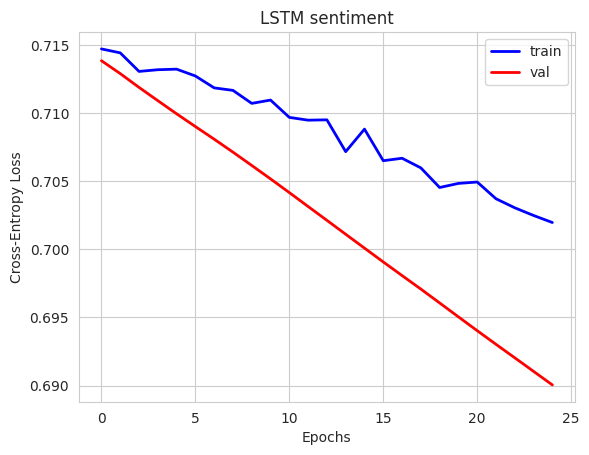

In [ ]:
#generate plots
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

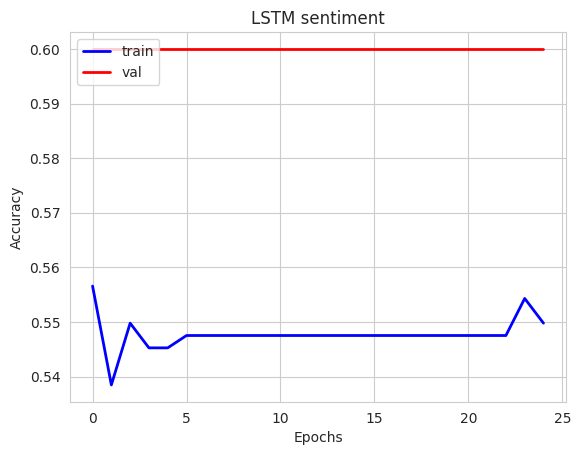

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('LSTM sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()


In [ ]:
predictions = model.predict(word_seq_test)
# predictions= predictions.ravel()

# sample=pd.read_csv('test_dat.csv')
test_df['pred']= (predictions>0.5).astype(int)
test_df[['pred', "target"]]

2/2 [==============================] - 1s 13ms/step


,pred,target
176,1,0
77,1,0
361,1,1
90,1,0
368,1,1
210,1,0
177,1,0
250,1,1
518,1,1
199,1,0


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.metrics import macro_averaged_mean_absolute_error

print("Accuracy -> ",accuracy_score(test_df.target, test_df.pred))
print("Recall -> ",recall_score(test_df.target, test_df.pred,average='macro'))
print("Precision -> ",precision_score(test_df.target, test_df.pred,average='macro'))
print("F1 score -> ",f1_score(test_df.target, test_df.pred,average='macro'))
# print("MAE -> ",mean_absolute_error(test_df.target, test_df.pred))
print("Macro MAE -> ",macro_averaged_mean_absolute_error(test_df.target, test_df.pred))
print(confusion_matrix(test_df.target, test_df.pred))

Accuracy ->  0.5818181818181818
Recall ->  0.5
Precision ->  0.2909090909090909
F1 score ->  0.367816091954023
Macro MAE ->  0.5
[[ 0 23]
 [ 0 32]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
